# Data Exploration Text Captcha 

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
#to go through all files/images use this:
for entry in os.scandir("../data"):
    #and whatever you want to do with them
    print(entry.name)


In [3]:
data = "../data"

In [17]:
#colors
allcolors = {}
#maketotalcount
for entry in os.scandir("../data"):
    #get all the used colors in [(count, color)] format
    usedcolors = Image.open("../data/" + entry.name).getcolors(maxcolors=5000)
    if usedcolors == None:
        print("yup")
    else:
        for (count, color) in usedcolors:
            if color in allcolors.keys():
                allcolors[color] = allcolors[color] + count
            else:
                allcolors[color] = count

#print(allcolors)


In [7]:
labels = allcolors.keys()
allcolors = dict(zip(d.keys(), [v/totalcount for v in d.values()])) #update dictionary so that it has fractionals
sizes = list(allcolors.values())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

NameError: name 'd' is not defined

# Character Frequency 

In [5]:
# Get the number of characters in the data set
captcha_list = []
characters = {}
for captcha in os.listdir(data):
    captcha_list.append(captcha)

    captcha_code = captcha.split(".")[0]
    for i in captcha_code:
        characters[i] = characters.get(i, 0) +1

In [23]:
characters

{'1': 9550,
 'J': 9483,
 '8': 9421,
 'X': 9456,
 'M': 9365,
 '3': 9465,
 'd': 9259,
 'k': 9327,
 'E': 9315,
 'V': 9332,
 's': 9540,
 'B': 9466,
 '4': 9501,
 't': 9355,
 'y': 9458,
 '5': 9429,
 'r': 9362,
 '6': 9570,
 'g': 9399,
 'w': 9461,
 'O': 9418,
 'C': 9432,
 '9': 9435,
 'b': 9297,
 'A': 9410,
 'v': 9598,
 'S': 9391,
 'W': 9501,
 'u': 9463,
 'a': 9381,
 'x': 9470,
 'D': 9435,
 'l': 9420,
 'U': 9549,
 '7': 9441,
 'e': 9500,
 'P': 9396,
 'F': 9538,
 'I': 9479,
 'G': 9555,
 'Z': 9367,
 'L': 9459,
 'n': 9237,
 'T': 9469,
 'p': 9229,
 'K': 9434,
 'q': 9231,
 'R': 9459,
 'm': 9544,
 'h': 9294,
 'Y': 9570,
 'c': 9355,
 'z': 9489,
 '2': 9418,
 'f': 9344,
 'i': 9471,
 'N': 9324,
 'Q': 9168,
 'j': 9303,
 'H': 9522}

In [6]:
sorted_characters = {k: v for k, v in sorted(characters.items(), key=lambda item: item[1])}

In [7]:
list(sorted_characters.items())[:4]

[('Q', 9168), ('p', 9229), ('q', 9231), ('n', 9237)]

In [8]:
list(sorted_characters.items())[-4:]

[('G', 9555), ('6', 9570), ('Y', 9570), ('v', 9598)]

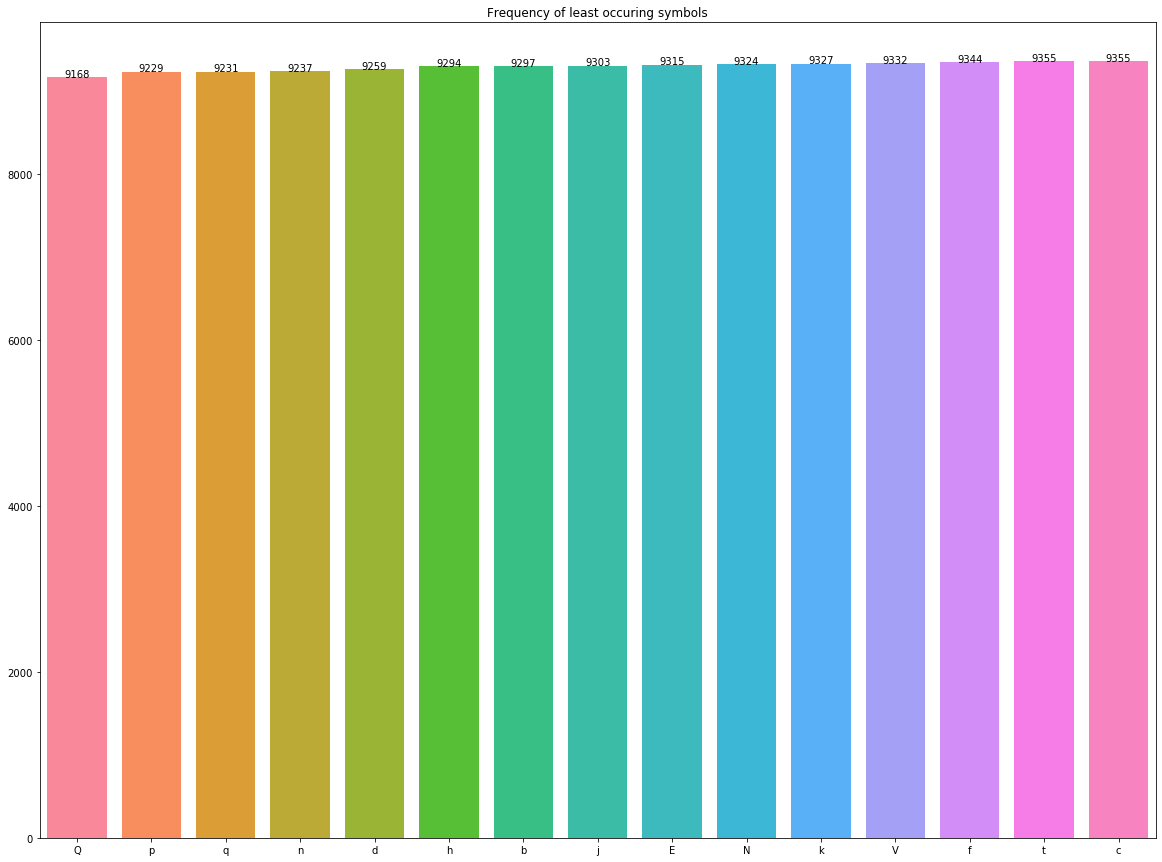

In [10]:
# Plot distribution of train/test image shapes
import seaborn as sns
%matplotlib inline

least_freq_keys = list(sorted_characters.keys())[:15]
least_freq_values = list(sorted_characters.values())[:15]#.astype(float) #


plt.figure(figsize=(20,15))
g = sns.barplot(least_freq_keys, least_freq_values, saturation=1)

for index, value in enumerate(least_freq_keys):
    g.text(index,least_freq_values[index], round(least_freq_values[index],2),color='black', ha="center")

plt.title("Frequency of least occuring symbols")
plt.show()

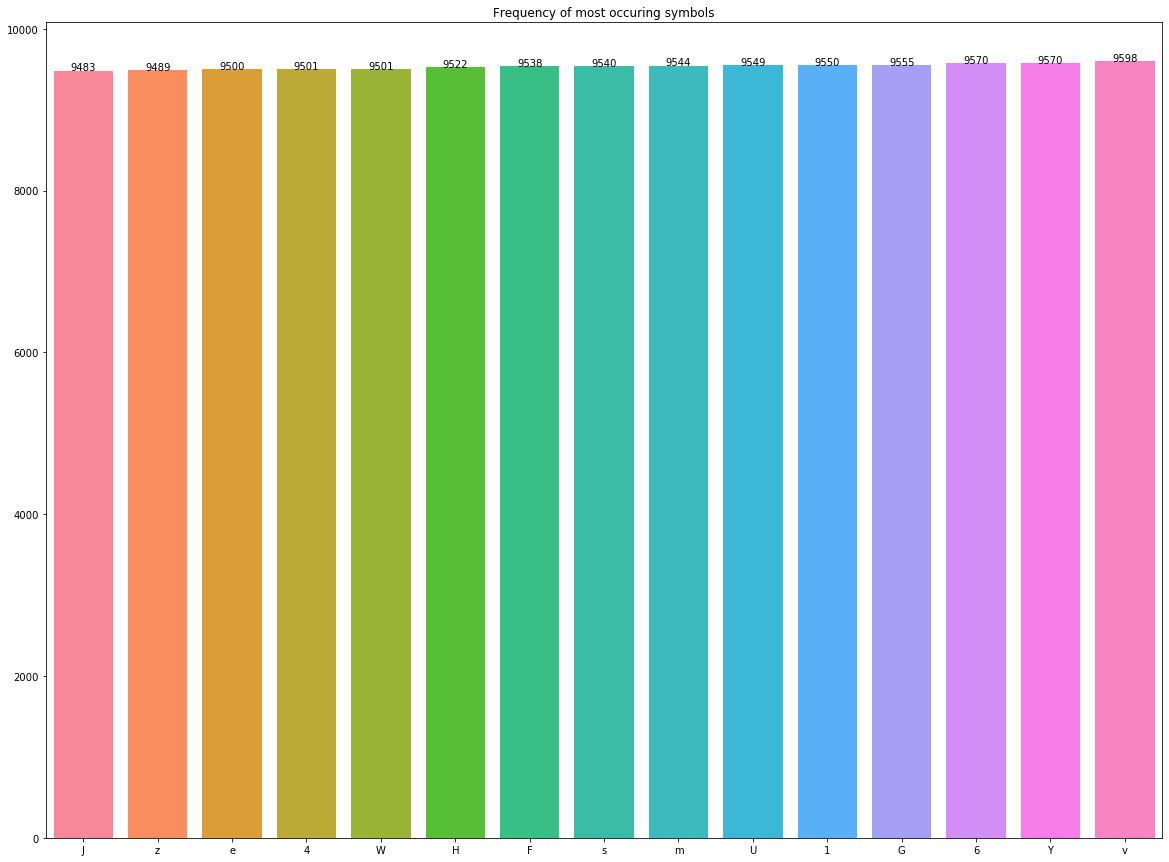

In [11]:
highest_freq_keys = list(sorted_characters.keys())[-15:]
#values = characters.values() #list(loss.values())).astype(float)
highest_freq_values = list(sorted_characters.values())[-15:]#.astype(float) #

plt.figure(figsize=(20,15))
g = sns.barplot(highest_freq_keys, highest_freq_values, saturation=1)

for index, value in enumerate(highest_freq_keys):
    g.text(index,highest_freq_values[index], round(highest_freq_values[index],2),color='black', ha="center")

plt.title("Frequency of most occuring symbols")
plt.show()

In [12]:
# Check if all alphabet characters are in the data set
alphabet = list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890')


# a list of the alphanumeric characters in the dataset
alphabet_in_ds = list(sorted_characters.keys())

alphabet_check = []
missing_in_alphabet_ds = []

# Check which alphanumeric values are in the dataset
for key in alphabet_in_ds:
    if key in alphabet:
        alphabet_check.append(key)


# Check which alphanumeric values are in the alphabet, but missing in the dataset
for letter in alphabet:
    if letter not in alphabet_check:
        missing_in_alphabet_ds.append(letter)


missing_in_alphabet_ds

['o', '0']

# Dimensions
### Checked distribution colored and non colored captchas, then checked the dimensions of the captchas

In [28]:
# Check the distribution of colored and non colored captchas
colored_captchas = 0
BandW_captchas = 0

for captcha in os.listdir(data):
    image = plt.imread(f"../data/{captcha}")
    dimensions = np.shape(image)
    
    #get the third value of the tuple, corresponding to the rgb value of the image
    if dimensions[2] < 3:
        BandW_captchas += 1
    elif dimensions[2] == 3:    
        colored_captchas += 1
    else:
        print("Somehow you got more colors in your dimensions")

In [25]:
print(f"Colored: {colored_captchas}")
print(f"Black and White: {BandW_captchas}")

Colored: 113062
Black and White: 0


In [26]:
# Check if the all images have the same dimension

Unique_dimensions = []

for captcha in os.listdir(data):
    image = plt.imread(f"../data/{captcha}")
    image_shape = np.shape(image)
    image_dimension = (image_shape[0], image_shape[1])

    if image_dimension not in Unique_dimensions:
        Unique_dimensions.append(image_dimension)

Unique_dimensions_count = len(Unique_dimensions)

print(Unique_dimensions_count)

1


In [27]:
if Unique_dimensions_count < 6:
    print(Unique_dimensions)

[(40, 150)]


# Get coordinates of text in image

In [10]:
! pip install pytesseract
! pip install tesseract

  Stored in directory: C:\Users\Simon\AppData\Local\pip\Cache\wheels\82\1f\d9\24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract


In [12]:


pytesseract.pytesseract.tesseract_cmd = 'C:\\Users\\Simon\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe'  # your path may be different


AttributeError: module 'pytesseract.pytesseract' has no attribute 'pytesseract'

In [8]:
# https://tesseract-ocr.github.io/tessdoc/tess4/Make-Box-Files.html
# https://pypi.org/project/pytesseract/
# -------------> Wanted to find the coordinates of the text in the images, which can be found with the methods above, but I couldnt get it to work yet


from pytesseract import pytesseract
from PIL import Image

Image_cordinates = [] 

for captcha in os.listdir("../data"):
    image = plt.imread(f"../data/{captcha}")

    data=pytesseract.image_to_string(image,lang='eng',config='hocr')
    Image_cordinates.append(data)
print(Image_cordinates)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.